### **Análisis Exploratorio de Datos - Precio de las tortilla en México 2007 - 2024**

In [1]:
# Cargar librerias necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

##### *Cargar Datos*

In [2]:
df_tortilla_price = pd.read_csv('../data/raw/tortilla_prices.csv')
df_tortilla_price.head(15)

,State,City,Year,Month,Day,Store type,Price per kilogram
0,Aguascalientes,Aguascalientes,2007,1,10,Mom and Pop Store,9.90
1,Baja California,Mexicali,2007,1,10,Mom and Pop Store,NaN
2,Baja California,Tijuana,2007,1,10,Mom and Pop Store,10.00
3,Baja California Sur,La Paz,2007,1,10,Mom and Pop Store,10.00
4,Campeche,Campeche,2007,1,10,Mom and Pop Store,10.00
5,Coahuila,Piedras Negras,2007,1,10,Mom and Pop Store,10.00
6,Coahuila,Saltillo,2007,1,10,Mom and Pop Store,NaN
7,Colima,Colima,2007,1,10,Mom and Pop Store,10.00
8,Chiapas,Tapachula,2007,1,10,Mom and Pop Store,NaN
9,Chiapas,Tuxtla Gutiérrez,2007,1,10,Mom and Pop Store,9.20


In [3]:
df_tortilla_price.tail(15)

,State,City,Year,Month,Day,Store type,Price per kilogram
289131,Sonora,Hermosillo,2024,10,21,Big Retail Store,14.08
289132,Sonora,Nogales,2024,10,21,Big Retail Store,14.27
289133,Sonora,San Luis Río Colorado,2024,10,21,Big Retail Store,15.45
289134,Tabasco,Villahermosa,2024,10,21,Big Retail Store,13.17
289135,Tamaulipas,Cd. Victoria,2024,10,21,Big Retail Store,14.77
289136,Tamaulipas,Matamoros,2024,10,21,Big Retail Store,15.63
289137,Tamaulipas,Nuevo Laredo,2024,10,21,Big Retail Store,16.96
289138,Tamaulipas,Reynosa,2024,10,21,Big Retail Store,16.06
289139,Tamaulipas,Tampico,2024,10,21,Big Retail Store,14.23
289140,Tlaxcala,Tlaxcala,2024,10,21,Big Retail Store,13.23


#### **Identificar el número de filas y columnas**

In [4]:
num_filas, num_columnas = df_tortilla_price.shape
print(f'Número de filas: {num_filas}\nNúmero de columnas: {num_columnas}')

Número de filas: 289146
Número de columnas: 7


#### **Identificar el tipo de datos**

In [5]:
# Número de Filas y Columnas
df_tortilla_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289146 entries, 0 to 289145
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   State               289146 non-null  object 
 1   City                289146 non-null  object 
 2   Year                289146 non-null  int64  
 3   Month               289146 non-null  int64  
 4   Day                 289146 non-null  int64  
 5   Store type          289146 non-null  object 
 6   Price per kilogram  282756 non-null  float64
dtypes: float64(1), int64(3), object(3)
memory usage: 15.4+ MB


* **State y City**: con columnas con nombre por lo que object es correcto.
* **Year, Month y Day:** son int64 por lo que se tranformara más adelante a tipo datetime.
* **Store type:** es una columna con los tipos de tienda por lo que object es correcto.
* **Price per kilogram:** es de tipo float64 por lo que es correcto.

#### **Identificar valores nulos**

In [6]:
# Identificar valores nulos
print('Identificar Valores Nulos por Columnas')
valores_nulos = df_tortilla_price.isnull().sum()
print(valores_nulos)

Identificar Valores Nulos por Columnas
State                    0
City                     0
Year                     0
Month                    0
Day                      0
Store type               0
Price per kilogram    6390
dtype: int64


#### **Identificar valores duplicados**

In [7]:
# Identificar valores duplicados
print('Identificar Valores duplicados por columnas')
for nombre_columna in df_tortilla_price.columns:
    valores_duplicados = df_tortilla_price[nombre_columna].duplicated().sum()
    print(f'Valores duplicados en la columnas {nombre_columna} ')
    print(valores_duplicados)
    print('-' * 30)

Identificar Valores duplicados por columnas
Valores duplicados en la columnas State 
289114
------------------------------
Valores duplicados en la columnas City 
289090
------------------------------
Valores duplicados en la columnas Year 
289128
------------------------------
Valores duplicados en la columnas Month 
289134
------------------------------
Valores duplicados en la columnas Day 
289115
------------------------------
Valores duplicados en la columnas Store type 
289144
------------------------------
Valores duplicados en la columnas Price per kilogram 
287869
------------------------------


In [8]:
print('Identificar Valores Duplicados')
print(df_tortilla_price.duplicated().sum())

Identificar Valores Duplicados
0


**Variables Categóricas**
1. State
2. City
3. Store type

(Bar Plot, Pie Chart)


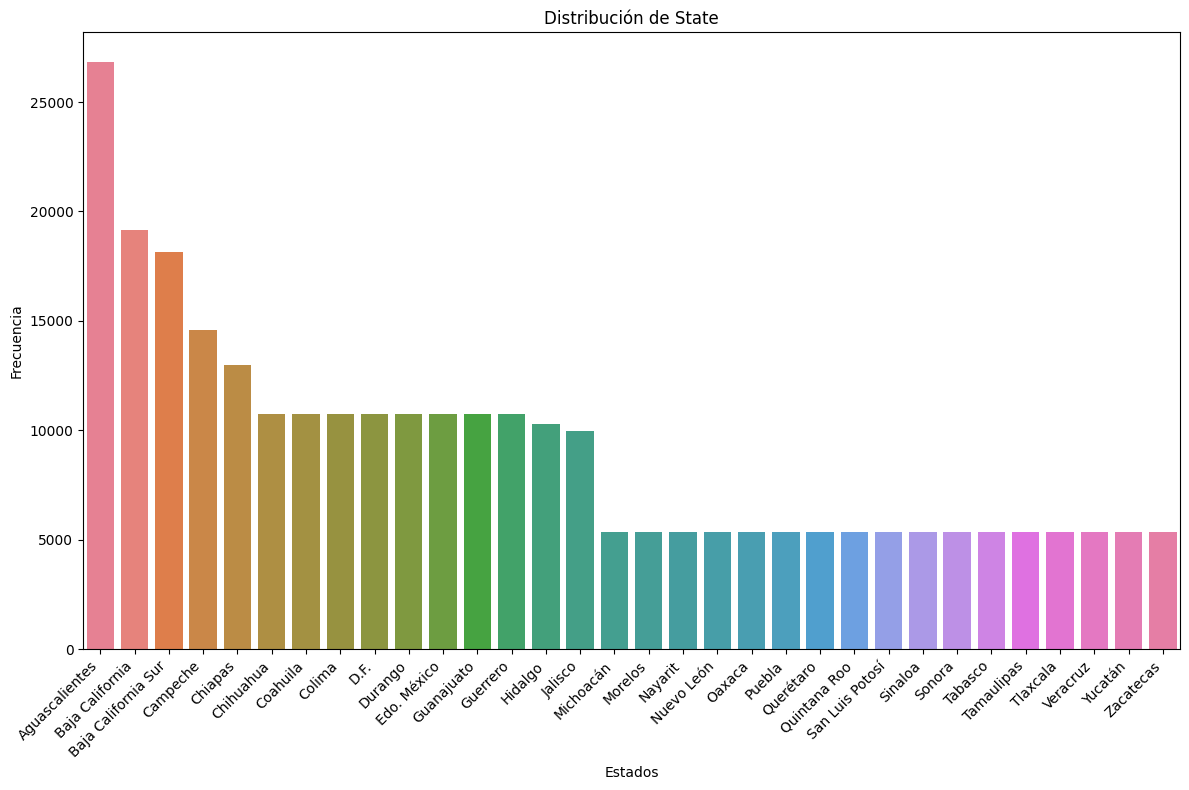

In [9]:
state = df_tortilla_price['State'].value_counts()

plt.figure(figsize=(12,8))
sns.barplot(x=state.index.sort_values(ascending='False'), y=state.values, hue=state.index.sort_values(ascending='False'))
plt.title('Distribución de State')
plt.xlabel('Estados')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

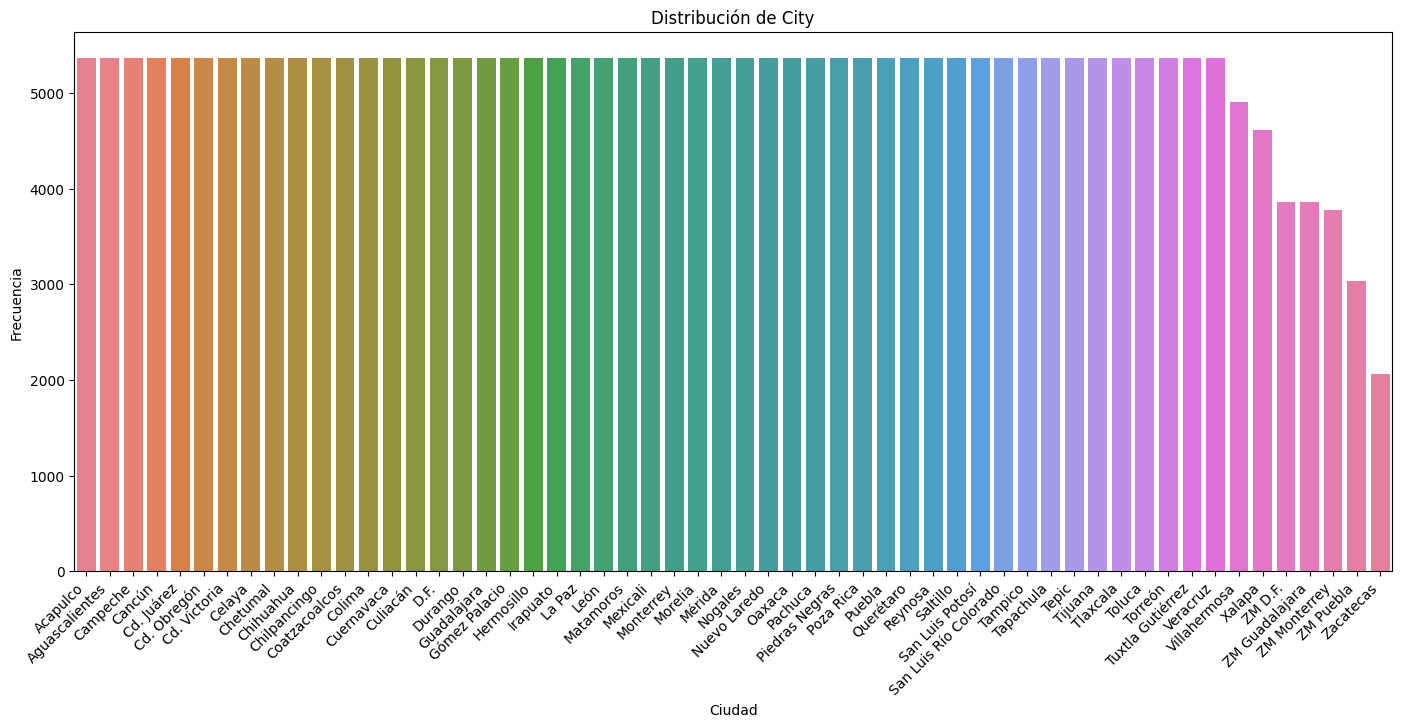

In [10]:
city = df_tortilla_price['City'].value_counts()

plt.figure(figsize=(17,7))
sns.barplot(x=city.index.sort_values(ascending='False'), y=city.values, hue=city.index.sort_values(ascending='False'))
plt.title('Distribución de City')
plt.xlabel('Ciudad')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')

plt.show()

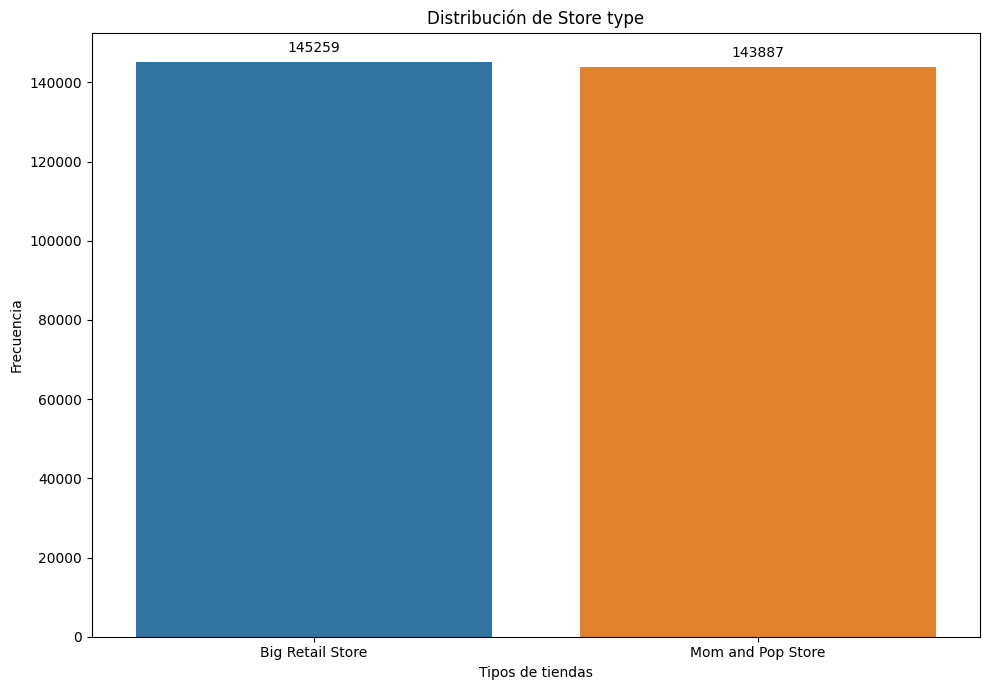

In [11]:
store_type = df_tortilla_price['Store type'].value_counts()

plt.figure(figsize=(10,7))
ax = sns.barplot(x=store_type.index.sort_values(ascending='False'), y=store_type.values, hue=store_type.index.sort_values(ascending='False'))
plt.title('Distribución de Store type')
plt.xlabel('Tipos de tiendas')
plt.ylabel('Frecuencia')
#plt.xticks(rotation=45, ha='right')

# Agregar valores a las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.00f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

**Variables Numéricas**
1. Year
2. Month
3. Day
4. Price per Kilogram

(Histogramas y Box Plot(Diagrama de Caja))

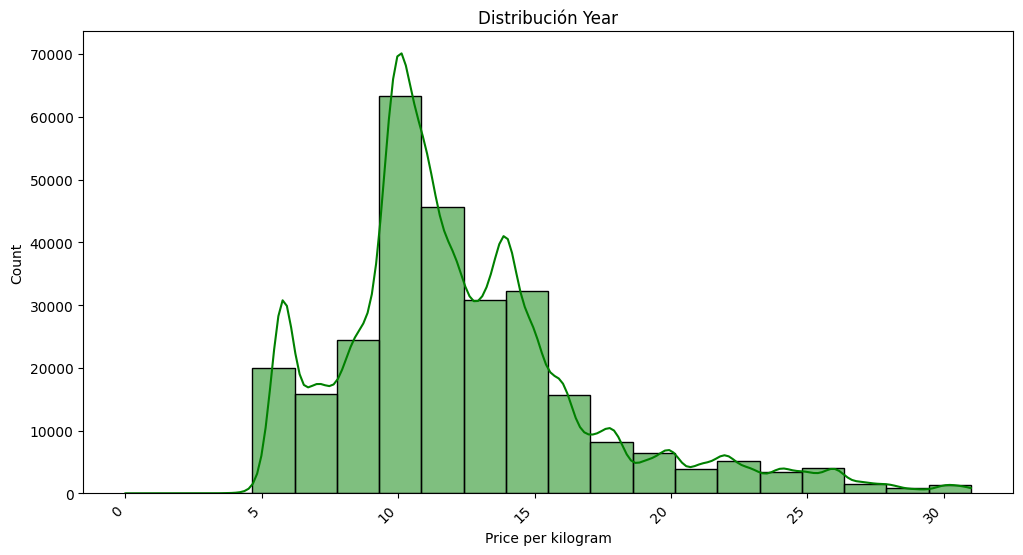

In [ ]:
price_per_kilogram = df_tortilla_price['Price per kilogram']

plt.figure(figsize=(12,6))
sns.histplot(x=price_per_kilogram, bins=20, kde=True, color='g')
plt.title('Distribución Price per Kilogram')
plt.xlabel('Precio por kilogramo')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')

plt.show()

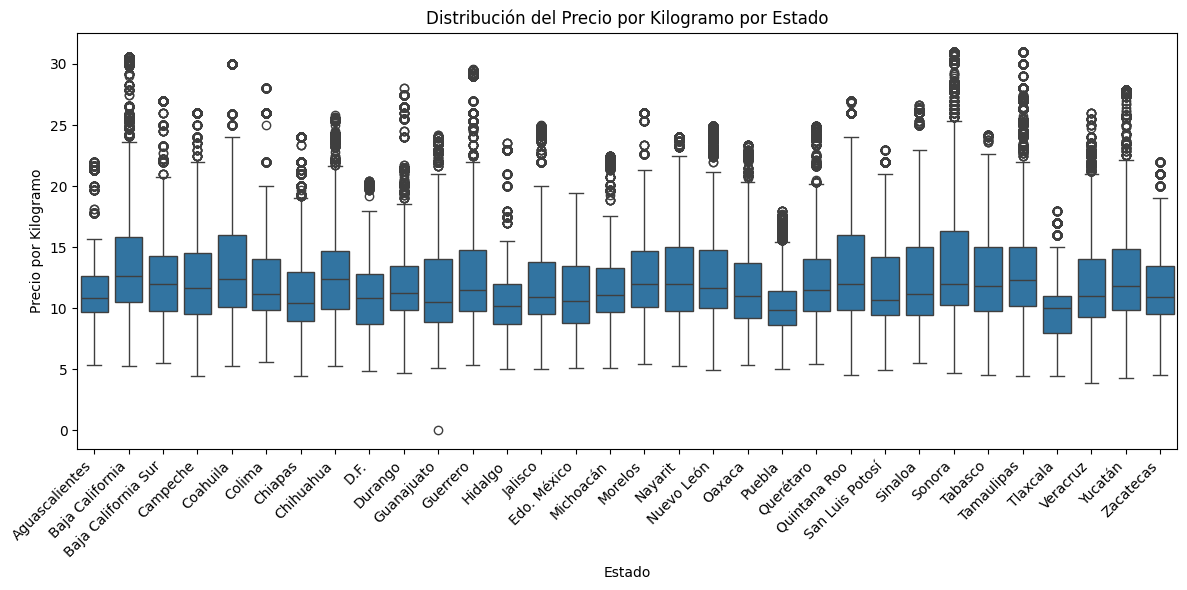

In [93]:
plt.figure(figsize=(12,6))
sns.boxplot(x='State', y='Price per kilogram', data=df_tortilla_price)
plt.title('Distribución del Precio por Kilogramo por Estado')
plt.xlabel('Estado')
plt.ylabel('Precio por Kilogramo')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()